## Part 2 of 4.9 Data visualizations
### This script contains the following points:

#### Q1. Import the necessary analysis and visualization libraries
#### Q3. Create a histogram of the “order_hour_of_day” column
#### Q4. Create a bar chart from the “loyalty_flag” column
#### Q5. Check whether there’s a difference in expenditure (the “prices” column) (line chart)
#### Q6. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents (line chart)
#### Q7. Explore whether there’s a connection between age and spending power (income) (scatterplot)
#### Q8. Export all visualizations

---------------------------------------------------------------------------------------------------------------------------
#### Q1. Import the necessary analysis and visualization libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\keanu\OneDrive\Desktop\Career Foundry\03-11-23 Instacart Basket Analysis"

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

In [4]:
# Additional setup for supressing scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
df.shape

(32404859, 33)

In [6]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.00,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.00,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.00,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.00,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [7]:
# Remove redundant index column '_merge'
df = df.drop(columns=['_merge'])

In [8]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,freq_flag,first_name,last_name,gender,state,age,date_joined,dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.00,196,1,1,Soda,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.00,196,1,1,Soda,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.00,196,1,1,Soda,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.00,196,1,1,Soda,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


#### Q3. Create a histogram of the “order_hour_of_day” column

In [9]:
# Describe the "order_hour_of_day" column
df['order_hour_of_day'].describe()

count   32404859.00
mean          13.43
std            4.25
min            0.00
25%           10.00
50%           13.00
75%           16.00
max           23.00
Name: order_hour_of_day, dtype: float64

In [10]:
df['order_hour_of_day'].mean()

13.42514895682774

In [11]:
df['order_hour_of_day'].median()

13.0

In [12]:
df['order_hour_of_day'].max()

23

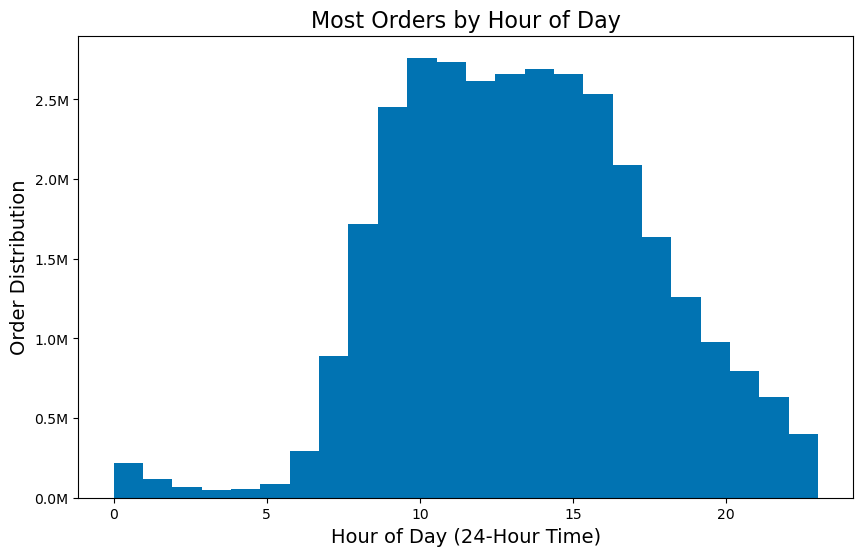

In [13]:
# Create a histogram of the “order_hour_of_day” column


# Set the fig size
plt.figure(figsize=(10, 6)) 

# Use Seaborn color palette for better aesthetics
colors = sns.color_palette("colorblind")

hist = df['order_hour_of_day'].plot.hist(bins = 24, color=colors)

# Add titles and labels
plt.title('Most Orders by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day (24-Hour Time)', fontsize=14)
plt.ylabel('Order Distribution', fontsize=14)

# Format y-axis labels as floats with one decimal place
hist.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.1f}M'.format(x / 1e6)))

# Save the chart as an image file
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_hist.png'))

# Show the plot
#plt.tight_layout()
           
plt.show()

#### NOTE: From around 7am to 7pm Instacart sales have the most orders with a peak at 10am. Judging by the mean and median, the data seems consistent with no major outliers.

#### Q4. Create a bar chart from the “loyalty_flag” column

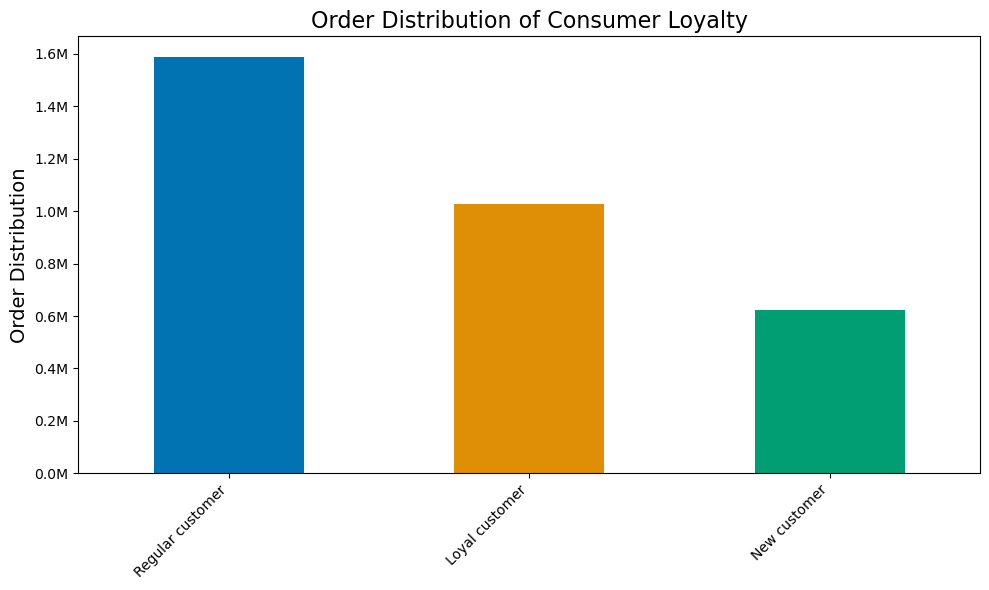

In [14]:
# Create a bar chart from the “loyalty_flag” column


# Set the fig size
plt.figure(figsize=(10, 6)) 

# Use Seaborn color palette for better aesthetics
colors = sns.color_palette("colorblind")

# Create a bar chart
bar = df['loyalty_flag'].value_counts().plot.bar(color=colors)

# Add titles and labels
plt.title('Order Distribution of Consumer Loyalty', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Order Distribution', fontsize=14)

# Improve readability by rotating x-axis labels
plt.xticks(rotation=45, ha='right')

# Format y-axis labels as floats with one decimal place
bar.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.1f}M'.format(x / 1e7)))

# Save the chart as an image file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_flag_bar.png'), bbox_inches='tight')

# Show the plot
plt.tight_layout()
           
plt.show()

#### NOTE: Regular customers on average buy more products. Adding a customer benefits program may boost sales initiative.

#### Q5. Check whether there’s a difference in expenditure (the “prices” column) (line chart)

In [15]:
# Set the seed
np.random.seed(4)

In [16]:
# Create a list holding f True/False values
dev = np.random.rand(len(df)) <= 0.7

In [17]:
# Store 70/30 ratio in each dataframe
big = df[dev]

In [18]:
small = df[~dev]

In [19]:
# Check output len of entire dataframe
len(df)

32404859

In [20]:
# Check output len of samples
len(small) + len(big)

32404859

In [21]:
# Reducing your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.”
df_2 = small[['order_hour_of_day','prices']]

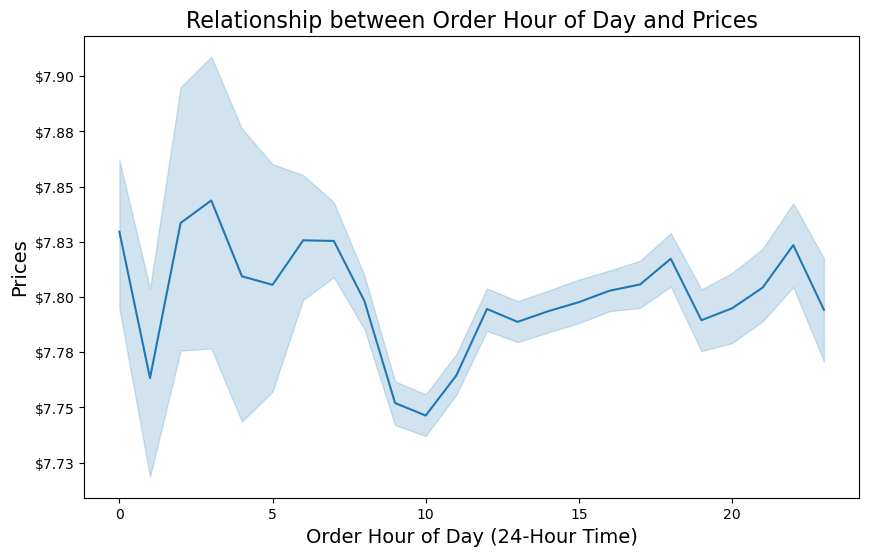

In [22]:
# Relationship between order hour of day and prices


# Set the fig size
plt.figure(figsize=(10, 6)) 

# Create line plot
line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

# Add titles and labels
plt.title('Relationship between Order Hour of Day and Prices', fontsize=16)
plt.xlabel('Order Hour of Day (24-Hour Time)', fontsize=14)
plt.ylabel('Prices', fontsize=14)

# Format y-axis labels as floats with two decimal place for 'Prices' and dollar amount symbol
line.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:.2f}'.format(x)))

# Save the chart as an image file
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_order_hour_line.png'))

# Show the lineplot
#plt.tight_layout()        
plt.show()

#### NOTE: Higher priced items being bought in the early mornings to late night time can demonstrate customer behaviors and a higher need for to buy food items at these specific times of day, no matter if the price is slightly higher. However, spending higher doesnt mean buying more, a look into the order_hour_of_day histogram confirms that at the peak of the day around 10am most orders are around 7.75, 10c lower than that of around early morning hours.

#### Q6. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents (line chart)

In [23]:
# Reducing your samples to only those columns necessary for the chart, namely “age” and “dependants”
df_3 = small[['age','dependants']]

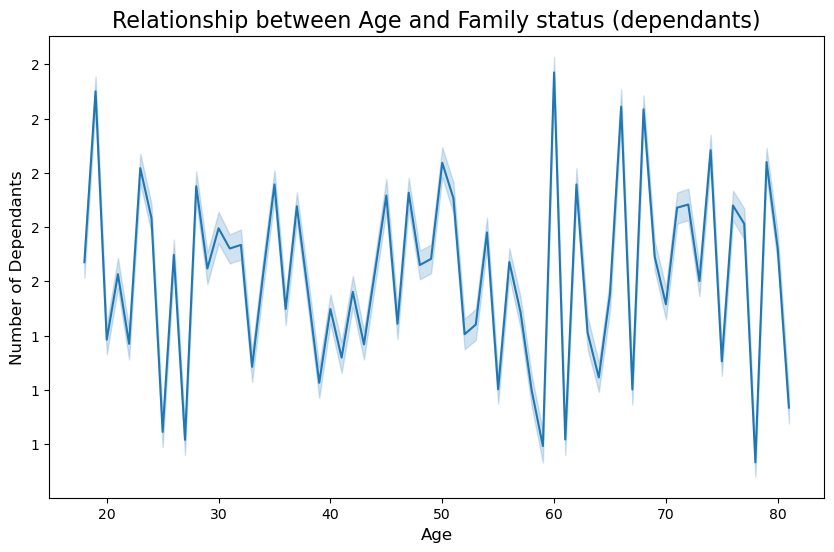

In [24]:
# Relationship between age and family status (dependants)
# Set the fig size
plt.figure(figsize=(10, 6))

# Create 2nd line chart
line_2 = sns.lineplot(data = df_3, x = 'age', y = 'dependants')

# Add titles and labels
plt.title('Relationship between Age and Family status (dependants)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Dependants', fontsize=12)

# Format y-axis labels as an Int for 'dependants'
line_2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

# Save the chart as an image file
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dependants_line.png'))

# Show the lineplot
#plt.tight_layout()        
plt.show()

#### Note: No clear connection between age and number of dependants as many people have kids at different ages and by varying amounts.

#### Q7. Explore whether there’s a connection between age and spending power (income) (scatterplot)

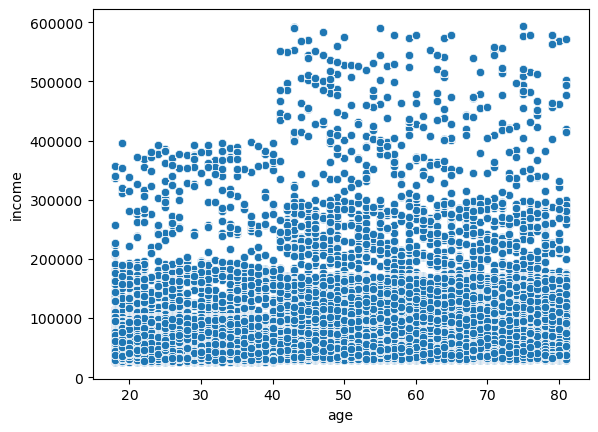

In [25]:
# Relationship between age vs. income
plt = sns.scatterplot(x = 'age', y = 'income', data = df)

#### Note: The scatterplot demonstrates a weak positive correlation between age and spending power, as age increases, so will spending habits.

---------------------------------------------------------------------------------------------------------------------------
#### Q8. Export all visualizations to ensure exports

In [26]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_hist.png'), bbox_inches='tight')

In [27]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_flag_bar.png'), bbox_inches='tight')

In [28]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_order_hour_line.png'), bbox_inches='tight')

In [29]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dependants_line.png'), bbox_inches='tight')

In [30]:
plt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_plt.png'), bbox_inches='tight')